# How are cells connected

### This code allows you to get the total number of junctions, the number of non triangular junctions, and a bar plot showing the ratio of non triangular junctions by species

# All imports

In [1]:
import napari
import skimage.data
import skimage.filters
import numpy as np
from napari.types import LabelsData
from skimage.filters import threshold_otsu 
from skimage import morphology
from skimage.morphology import disk
from skimage.filters import median   
from skimage.morphology import skeletonize
import matplotlib.pyplot as plt
from skimage.morphology import square, cube 
import skimage.filters.rank as rank
from skimage import measure
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from skimage import color
from tifffile import imread
import matplotlib as plt
import glob
from skimage.morphology import disk, binary_erosion
from SRC.jonction2 import *

### All user choice :
At the beginning of each group (Puzzle, stomates etc) you have to change fnames with your path

### Puzzle

In [11]:
fnames = glob.glob('Puzzle/*.tif')


image_name_list = []

nb_junction_list = []
nb_non_triangular_junction_list = []
csv_list = []

for image_pathway in fnames :
    #apply functions
    #1 creation of the mask
    skeleton = jonction2.masque_jonction_puzzle(image_pathway)
    #2 get the number of total junction
    df_junction= jonction2.jonctions_totales(skeleton)
    #3 get the number of non triangular junction
    df_j4 = jonction2.jonctions_non_triangulaires (df_junction)
    print("on avance")
    
    #Image name column
    splitted_path = image_pathway.split("\\")
    image_name_list.append(splitted_path[-1])
    
    #Total number of junction
    nb_junction = len(df_junction["label"])
    nb_junction_list.append(nb_junction)
    
    #Number of non triangular junction
    nb_non_triangular_junction = len(df_j4["label"])
    nb_non_triangular_junction_list.append(nb_non_triangular_junction)
    
    #Csv list column
    csv_list.append('non_triangular_junction_'+splitted_path[-1].replace('.tif', '.csv'))

    df_j4 = df_j4.drop(columns=["label"])
    df_j4.rename(columns={"centroid-0":"axis-0"}, inplace=True)
    df_j4.rename(columns={"centroid-1" : "axis-1"}, inplace=True)
    non_triangular_junctions= df_j4

    #Creation of one csv per image
    centroids_csv_data = df_j4.to_csv('non_triangular_junctions_'+splitted_path[-1]+'.csv', index = True)
    
      
    #create a dico
    dico = {'Image_fname' : image_name_list, 'number_non_triangular_junction' : nb_non_triangular_junction_list, "total_number_of junction" : nb_junction_list, "file name": csv_list}
    
    #create a dataframe
    puzzle_df = pd.DataFrame(dico)
    
puzzle_df


['Puzzle\\4-15-400x-2-01.tif', 'Puzzle\\4-17-400x-2-01.tif', 'Puzzle\\4-17-400x-2-02.tif', 'Puzzle\\4-17-400x-2-03.tif', 'Puzzle\\6-21-400x-2-01.tif', 'Puzzle\\6-21-400x-2-04.tif', 'Puzzle\\8-06-700x-2-01.tif', 'Puzzle\\8-06-700x-2-02.tif', 'Puzzle\\8-06-700x-2-03.tif', 'Puzzle\\8-06-700x-2-04.tif']
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance


,Image_fname,number_non_triangular_junction,total_number_of junction,file name
0,4-15-400x-2-01.tif,42,852,non_triangular_junction_4-15-400x-2-01.csv
1,4-17-400x-2-01.tif,41,465,non_triangular_junction_4-17-400x-2-01.csv
2,4-17-400x-2-02.tif,52,527,non_triangular_junction_4-17-400x-2-02.csv
3,4-17-400x-2-03.tif,17,420,non_triangular_junction_4-17-400x-2-03.csv
4,6-21-400x-2-01.tif,414,1788,non_triangular_junction_6-21-400x-2-01.csv
5,6-21-400x-2-04.tif,761,2786,non_triangular_junction_6-21-400x-2-04.csv
6,8-06-700x-2-01.tif,321,1526,non_triangular_junction_8-06-700x-2-01.csv
7,8-06-700x-2-02.tif,140,1182,non_triangular_junction_8-06-700x-2-02.csv
8,8-06-700x-2-03.tif,223,1287,non_triangular_junction_8-06-700x-2-03.csv
9,8-06-700x-2-04.tif,214,1369,non_triangular_junction_8-06-700x-2-04.csv


### Normales

In [15]:
fnames = glob.glob("Normal\\Normal/"+'*.tif') 


image_name_list = []

nb_junction_list = []
nb_non_triangular_junction_list = []
csv_list = []

for image_pathway in fnames :
    #applying the functions:
    #1 : creation of the mask
    skeleton = jonction2.masque_jonction_normale(image_pathway)
    #2: get the number of total junction
    df_junction= jonction2.jonctions_totales(skeleton)
    #3: get the number of non triangular junctions
    df_j4 = jonction2.jonctions_non_triangulaires (df_junction)
    print("on avance")

    #Image name column
    splitted_path = image_pathway.split("\\")
    image_name_list.append(splitted_path[-1])
    #Total number of junction column
    nb_junction = len(df_junction["label"])
    nb_junction_list.append(nb_junction)
    #Number of non triangular junction
    nb_non_triangular_junction = len(df_j4["label"])
    nb_non_triangular_junction_list.append(nb_non_triangular_junction)
    #Csv name column
    csv_list.append('non_triangular_junction_'+splitted_path[-1].replace('.tif', '.csv'))


    df_j4 = df_j4.drop(columns=["label"])
    df_j4.rename(columns={"centroid-0":"axis-0"}, inplace=True)
    df_j4.rename(columns={"centroid-1" : "axis-1"}, inplace=True)
    non_triangular_junctions= df_j4

    #Creation of one csv file per name
    centroids_csv_data = df_j4.to_csv('non_triangular_junctions_'+splitted_path[-1]+'.csv', index = True)
    
      
    #create a dico
    dico = {'Image_fname' : image_name_list, 'number_non_triangular_junction' : nb_non_triangular_junction_list, "total_number_of junction" : nb_junction_list, "file name": csv_list}
    
    #create a dataframe
    normal_df = pd.DataFrame(dico)
    
normal_df


on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance


,Image_fname,number_non_triangular_junction,total_number_of junction,file name
0,7-01-700x-t-01.tif,201,1167,non_triangular_junction_7-01-700x-t-01.csv
1,7-01-700x-t-02.tif,324,1446,non_triangular_junction_7-01-700x-t-02.csv
2,7-01-700x-t-03.tif,467,1955,non_triangular_junction_7-01-700x-t-03.csv
3,7-01-700x-t-04.tif,401,1724,non_triangular_junction_7-01-700x-t-04.csv
4,7-01-700x-t-05.tif,337,1575,non_triangular_junction_7-01-700x-t-05.csv
5,7-01-700x-t2-01.tif,199,1333,non_triangular_junction_7-01-700x-t2-01.csv
6,7-01-700x-t2-02.tif,463,2078,non_triangular_junction_7-01-700x-t2-02.csv
7,7-01-700x-t2-03.tif,344,1770,non_triangular_junction_7-01-700x-t2-03.csv
8,7-01-700x-t2-04.tif,398,1956,non_triangular_junction_7-01-700x-t2-04.csv
9,7-01-700x-t2-05.tif,392,1979,non_triangular_junction_7-01-700x-t2-05.csv


### Normal veines

In [14]:
fnames = glob.glob("Normal + Veines\\Normal + Veines/"+'*.tif') 


image_name_list = []

nb_junction_list = []
nb_non_triangular_junction_list = []
csv_list = []

for image_pathway in fnames :
    #applying the functions:
    #1 creation of the skeleton
    skeleton = jonction2.masque_jonction_normal_veines(image_pathway)
    #2 get the total number of junctions
    df_junction= jonction2.jonctions_totales(skeleton)
    #check if there are junctions
    if not df_junction.empty:
        
        #3 get the number of non triangular junction
        df_j4 = jonction2.jonctions_non_triangulaires (df_junction)
        print("on avance")
        
        #Image name column
        splitted_path = image_pathway.split("\\")
        image_name_list.append(splitted_path[-1])
        
        #Total number of junction column
        nb_junction = len(df_junction["label"])
        nb_junction_list.append(nb_junction)
        
        #Number of non triangular junctions column
        nb_non_triangular_junction = len(df_j4["label"])
        nb_non_triangular_junction_list.append(nb_non_triangular_junction)
        
        #Name of the csv file column
        csv_list.append('non_triangular_junction_'+splitted_path[-1].replace('.tif', '.csv'))

        df_j4 = df_j4.drop(columns=["label"])
        df_j4.rename(columns={"centroid-0":"axis-0"}, inplace=True)
        df_j4.rename(columns={"centroid-1" : "axis-1"}, inplace=True)
        non_triangular_junctions= df_j4

        #Creation of one csv per image
        centroids_csv_data = df_j4.to_csv('non_triangular_junctions_'+splitted_path[-1]+'.csv', index = True)
    
      
        #create a dico
        dico = {'Image_fname' : image_name_list, 'number_non_triangular_junction' : nb_non_triangular_junction_list, "total_number_of junction" : nb_junction_list, "file name": csv_list}
    
        #create a dataframe
        normal_veines_df = pd.DataFrame(dico)
    
normal_veines_df

['Normal + Veines\\Normal + Veines\\4-01-700x-2-01.tif', 'Normal + Veines\\Normal + Veines\\4-01-700x-2-02.tif', 'Normal + Veines\\Normal + Veines\\4-01-700x-2-03.tif', 'Normal + Veines\\Normal + Veines\\4-01-700x-2-04.tif', 'Normal + Veines\\Normal + Veines\\4-01-700x-2-05.tif', 'Normal + Veines\\Normal + Veines\\4-01-700x-2-06.tif', 'Normal + Veines\\Normal + Veines\\4-02-700x-1-01.tif', 'Normal + Veines\\Normal + Veines\\4-02-700x-1-02.tif', 'Normal + Veines\\Normal + Veines\\4-02-700x-1-03.tif', 'Normal + Veines\\Normal + Veines\\4-02-700x-1-04.tif', 'Normal + Veines\\Normal + Veines\\4-02-700x-1-05.tif', 'Normal + Veines\\Normal + Veines\\4-02-700x-2-01.tif', 'Normal + Veines\\Normal + Veines\\4-02-700x-2-02.tif', 'Normal + Veines\\Normal + Veines\\4-02-700x-2-03.tif', 'Normal + Veines\\Normal + Veines\\4-02-700x-2-04.tif', 'Normal + Veines\\Normal + Veines\\4-02-700x-2-05.tif', 'Normal + Veines\\Normal + Veines\\7-24-400x-1-03.tif', 'Normal + Veines\\Normal + Veines\\7-24-400x-1-

,Image_fname,number_non_triangular_junction,total_number_of junction,file name
0,4-01-700x-2-01.tif,6,308,non_triangular_junction_4-01-700x-2-01.csv
1,4-01-700x-2-02.tif,4,320,non_triangular_junction_4-01-700x-2-02.csv
2,4-01-700x-2-03.tif,6,335,non_triangular_junction_4-01-700x-2-03.csv
3,4-01-700x-2-04.tif,6,349,non_triangular_junction_4-01-700x-2-04.csv
4,4-01-700x-2-05.tif,12,345,non_triangular_junction_4-01-700x-2-05.csv
5,4-01-700x-2-06.tif,13,332,non_triangular_junction_4-01-700x-2-06.csv
6,4-02-700x-1-01.tif,6,303,non_triangular_junction_4-02-700x-1-01.csv
7,4-02-700x-1-02.tif,18,350,non_triangular_junction_4-02-700x-1-02.csv
8,4-02-700x-1-03.tif,10,339,non_triangular_junction_4-02-700x-1-03.csv
9,4-02-700x-1-04.tif,12,278,non_triangular_junction_4-02-700x-1-04.csv


### Puzzle sombre

In [20]:
names = glob.glob("Puzzle Sombre\\Puzzle Sombre/"+'*.tif') 


image_name_list = []

nb_junction_list = []
nb_non_triangular_junction_list = []
csv_list = []

for image_pathway in fnames :
    #Applying functions:
    #1 get the skeleton
    skeleton = jonction2.masque_jonction_puzzle_sombre(image_pathway)
    #2 get the number of total junctions
    df_junction= jonction2.jonctions_totales(skeleton)
    #check if there are no problems with the df_junction
    if not df_junction.empty:
        print("here")
        #get the number of non triangular junction
        df_j4 = jonction2.jonctions_non_triangulaires (df_junction)
        print("on avance")

        #Image name column
        splitted_path = image_pathway.split("\\")
        image_name_list.append(splitted_path[-1])
        #Total number of junction column
        nb_junction = len(df_junction["label"])
        nb_junction_list.append(nb_junction)
        #Number of non triangular junction column
        nb_non_triangular_junction = len(df_j4["label"])
        nb_non_triangular_junction_list.append(nb_non_triangular_junction)
        #Csv file name column
        csv_list.append('non_triangular_junction_'+splitted_path[-1].replace('.tif', '.csv'))

        df_j4 = df_j4.drop(columns=["label"])
        df_j4.rename(columns={"centroid-0":"axis-0"}, inplace=True)
        df_j4.rename(columns={"centroid-1" : "axis-1"}, inplace=True)
        non_triangular_junctions= df_j4
        
        #Creation of csv file per image
        centroids_csv_data = df_j4.to_csv('non_triangular_junctions_'+splitted_path[-1]+'.csv', index = True)
    
      
        #create a dico
        dico = {'Image_fname' : image_name_list, 'number_non_triangular_junction' : nb_non_triangular_junction_list, "total_number_of junction" : nb_junction_list, "file name": csv_list}
    
        #create a dataframe
        puzzle_sombre_df = pd.DataFrame(dico)
    
puzzle_sombre_df

['Rondes + Veines\\Rondes + Veines\\3-15-700x-1-01.tif', 'Rondes + Veines\\Rondes + Veines\\3-15-700x-1-02.tif', 'Rondes + Veines\\Rondes + Veines\\3-15-700x-1-03.tif', 'Rondes + Veines\\Rondes + Veines\\3-15-700x-1-04.tif', 'Rondes + Veines\\Rondes + Veines\\3-15-700x-1-05.tif', 'Rondes + Veines\\Rondes + Veines\\5-20-700x-2-01.tif', 'Rondes + Veines\\Rondes + Veines\\5-20-700x-2-02.tif', 'Rondes + Veines\\Rondes + Veines\\5-20-700x-2-03.tif', 'Rondes + Veines\\Rondes + Veines\\5-20-700x-2-04.tif', 'Rondes + Veines\\Rondes + Veines\\5-20-700x-2-06.tif']
here
on avance
here
on avance
here
on avance
here
on avance
here
on avance
here
on avance
here
on avance
here
on avance
here
on avance
here
on avance


,Image_fname,number_non_triangular_junction,total_number_of junction,file name
0,3-15-700x-1-01.tif,305,1522,non_triangular_junction_3-15-700x-1-01.csv
1,3-15-700x-1-02.tif,150,1197,non_triangular_junction_3-15-700x-1-02.csv
2,3-15-700x-1-03.tif,186,1177,non_triangular_junction_3-15-700x-1-03.csv
3,3-15-700x-1-04.tif,239,1317,non_triangular_junction_3-15-700x-1-04.csv
4,3-15-700x-1-05.tif,184,1183,non_triangular_junction_3-15-700x-1-05.csv
5,5-20-700x-2-01.tif,427,1988,non_triangular_junction_5-20-700x-2-01.csv
6,5-20-700x-2-02.tif,534,2356,non_triangular_junction_5-20-700x-2-02.csv
7,5-20-700x-2-03.tif,786,2845,non_triangular_junction_5-20-700x-2-03.csv
8,5-20-700x-2-04.tif,880,3257,non_triangular_junction_5-20-700x-2-04.csv
9,5-20-700x-2-06.tif,1117,3685,non_triangular_junction_5-20-700x-2-06.csv


### Puzzle veines

In [17]:
fnames = glob.glob("Puzzle + Veines\\Puzzle + Veines/"+'*.tif') 


image_name_list = []

nb_junction_list = []
nb_non_triangular_junction_list = []
csv_list = []

for image_pathway in fnames :
    #Applying the functions
    #1 get the skeleton
    skeleton = jonction2.masque_jonction_puzzle_veines(image_pathway)
    #2 get the total number of junctions
    df_junction= jonction2.jonctions_totales(skeleton)
    #3 check if there are no problems with df_junction
    if not df_junction.empty:
        print("here")
        #4 get the number of non triangular junction
        df_j4 = jonction2.jonctions_non_triangulaires (df_junction)
        print("on avance")
        
        #Image name column
        splitted_path = image_pathway.split("\\")
        image_name_list.append(splitted_path[-1])
        #Total number of junction column
        nb_junction = len(df_junction["label"])
        nb_junction_list.append(nb_junction)
        #Numer of non triangular junction column
        nb_non_triangular_junction = len(df_j4["label"])
        nb_non_triangular_junction_list.append(nb_non_triangular_junction)
        #Csv file name column
        csv_list.append('non_triangular_junction_'+splitted_path[-1].replace('.tif', '.csv'))

        df_j4 = df_j4.drop(columns=["label"])
        df_j4.rename(columns={"centroid-0":"axis-0"}, inplace=True)
        df_j4.rename(columns={"centroid-1" : "axis-1"}, inplace=True)
        non_triangular_junctions= df_j4


        centroids_csv_data = df_j4.to_csv('non_triangular_junctions_'+splitted_path[-1]+'.csv', index = True)


        #create a dico
        dico = {'Image_fname' : image_name_list, 'number_non_triangular_junction' : nb_non_triangular_junction_list, "total_number_of junction" : nb_junction_list, "file name": csv_list}

        #create a dataframe
        puzzle_veines_df = pd.DataFrame(dico)
    
puzzle_veines_df

['Puzzle + Veines\\Puzzle + Veines\\4-15-400x-2-02.tif', 'Puzzle + Veines\\Puzzle + Veines\\4-15-400x-2-03.tif', 'Puzzle + Veines\\Puzzle + Veines\\4-15-400x-2-04.tif', 'Puzzle + Veines\\Puzzle + Veines\\4-17-400x-2-04.tif', 'Puzzle + Veines\\Puzzle + Veines\\6-19-400x-1-03.tif', 'Puzzle + Veines\\Puzzle + Veines\\6-19-400x-1-04.tif', 'Puzzle + Veines\\Puzzle + Veines\\6-21-400x-2-02.tif', 'Puzzle + Veines\\Puzzle + Veines\\6-21-400x-2-03.tif']
Empty DataFrame
Columns: [label, centroid-0, centroid-1]
Index: []
Empty DataFrame
Columns: [label, centroid-0, centroid-1]
Index: []
Empty DataFrame
Columns: [label, centroid-0, centroid-1]
Index: []
    label  centroid-0  centroid-1
0       1       194.0       181.5
1       2       216.0       131.5
2       3       216.0       171.0
3       4       220.0        66.5
4       5       222.0       177.0
..    ...         ...         ...
69     70       986.0       823.5
70     71       990.0       786.5
71     72      1005.0       799.0
72     73 

,Image_fname,number_non_triangular_junction,total_number_of junction,file name
0,4-17-400x-2-04.tif,6,74,non_triangular_junction_4-17-400x-2-04.csv


### Stomates

In [13]:
fnames = glob.glob("Stomates\\Stomates/"+'*.tif') 


image_name_list = []

nb_junction_list = []
nb_non_triangular_junction_list = []
csv_list = []

for image_pathway in fnames :
    #aplying the function
    #1 get the skeleton mask
    skeleton = jonction2.masque_jonction_stomates(image_pathway)
    #2 get the total number of junctions
    df_junction= jonction2.jonctions_totales(skeleton)
    #3 get the number of non triangular junctions
    df_j4 = jonction2.jonctions_non_triangulaires (df_junction)
    print("on avance")

    #Image name column
    splitted_path = image_pathway.split("\\")
    image_name_list.append(splitted_path[-1])
    #Total number of junction column
    nb_junction = len(df_junction["label"])
    nb_junction_list.append(nb_junction)
    #Number of non triangular junction column
    nb_non_triangular_junction = len(df_j4["label"])
    nb_non_triangular_junction_list.append(nb_non_triangular_junction)
    #Csv file name column
    csv_list.append('non_triangular_junction_'+splitted_path[-1].replace('.tif', '.csv'))

    df_j4 = df_j4.drop(columns=["label"])
    df_j4.rename(columns={"centroid-0":"axis-0"}, inplace=True)
    df_j4.rename(columns={"centroid-1" : "axis-1"}, inplace=True)
    non_triangular_junctions= df_j4

    #Creation of csv file per image
    centroids_csv_data = df_j4.to_csv('non_triangular_junctions_'+splitted_path[-1]+'.csv', index = True)
    
      
    #create a dico
    dico = {'Image_fname' : image_name_list, 'number_non_triangular_junction' : nb_non_triangular_junction_list, "total_number_of junction" : nb_junction_list, "file name": csv_list}
    
    #create a dataframe
    stomate_df = pd.DataFrame(dico)
    
stomate_df

on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance


,Image_fname,number_non_triangular_junction,total_number_of junction,file name
0,3-07-400x-1-01.tif,30,798,non_triangular_junction_3-07-400x-1-01.csv
1,3-07-400x-1-02.tif,12,803,non_triangular_junction_3-07-400x-1-02.csv
2,3-07-400x-1-03.tif,18,779,non_triangular_junction_3-07-400x-1-03.csv
3,3-07-400x-1-04.tif,27,804,non_triangular_junction_3-07-400x-1-04.csv
4,3-07-400x-2-01.tif,16,788,non_triangular_junction_3-07-400x-2-01.csv
5,3-07-400x-2-02.tif,18,762,non_triangular_junction_3-07-400x-2-02.csv
6,3-07-400x-2-03.tif,6,764,non_triangular_junction_3-07-400x-2-03.csv
7,3-07-400x-2-04.tif,23,849,non_triangular_junction_3-07-400x-2-04.csv
8,5-22-400x-1-01.tif,4,523,non_triangular_junction_5-22-400x-1-01.csv
9,5-22-400x-1-03.tif,6,597,non_triangular_junction_5-22-400x-1-03.csv


### Rondes + Veines-

In [18]:
fnames = glob.glob("Rondes + Veines\\Rondes + Veines/"+'*.tif') 


image_name_list = []

nb_junction_list = []
nb_non_triangular_junction_list = []
csv_list = []

for image_pathway in fnames :
    #Applying functions
    #1 get the skeleton 
    skeleton = jonction2.masque_rondes_veines(image_pathway)
    #2 get the total number of junction
    df_junction= jonction2.jonctions_totales(skeleton)
    #3 get the number of non triangular junction
    df_j4 = jonction2.jonctions_non_triangulaires (df_junction)
    print("on avance")
    
    #Image name column
    splitted_path = image_pathway.split("\\")
    image_name_list.append(splitted_path[-1])
    #Total number column
    nb_junction = len(df_junction["label"])
    nb_junction_list.append(nb_junction)
    #Number of non triangular junction column
    nb_non_triangular_junction = len(df_j4["label"])
    nb_non_triangular_junction_list.append(nb_non_triangular_junction)

    df_j4 = df_j4.drop(columns=["label"])
    df_j4.rename(columns={"centroid-0":"axis-0"}, inplace=True)
    df_j4.rename(columns={"centroid-1" : "axis-1"}, inplace=True)
    non_triangular_junctions= df_j4
    #Csv file name column
    csv_list.append('non_triangular_junction_'+splitted_path[-1].replace('.tif', '.csv'))


    #Creation of one csv file per image
    centroids_csv_data = df_j4.to_csv('non_triangular_junctions_'+splitted_path[-1]+'.csv', index = True)
    
      
    #create a dico
    dico = {'Image_fname' : image_name_list, 'number_non_triangular_junction' : nb_non_triangular_junction_list, "total_number_of junction" : nb_junction_list, "file name": csv_list}
    
    #create a dataframe
    rondes_veines_df = pd.DataFrame(dico)
    
rondes_veines_df

on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance
on avance


,Image_fname,number_non_triangular_junction,total_number_of junction,file name
0,3-15-700x-1-01.tif,2,424,non_triangular_junction_3-15-700x-1-01.csv
1,3-15-700x-1-02.tif,6,429,non_triangular_junction_3-15-700x-1-02.csv
2,3-15-700x-1-03.tif,6,379,non_triangular_junction_3-15-700x-1-03.csv
3,3-15-700x-1-04.tif,2,358,non_triangular_junction_3-15-700x-1-04.csv
4,3-15-700x-1-05.tif,0,360,non_triangular_junction_3-15-700x-1-05.csv
5,5-20-700x-2-01.tif,14,585,non_triangular_junction_5-20-700x-2-01.csv
6,5-20-700x-2-02.tif,4,612,non_triangular_junction_5-20-700x-2-02.csv
7,5-20-700x-2-03.tif,10,598,non_triangular_junction_5-20-700x-2-03.csv
8,5-20-700x-2-04.tif,12,521,non_triangular_junction_5-20-700x-2-04.csv
9,5-20-700x-2-06.tif,8,487,non_triangular_junction_5-20-700x-2-06.csv


In [21]:
#Concatenate the seven df to have only one
all_df = [rondes_veines_df, stomate_df, normal_df, normal_veines_df, puzzle_df, puzzle_veines_df, puzzle_sombre_df]

df = pd.concat(all_df)


,Image_fname,number_non_triangular_junction,total_number_of junction,file name
0,3-15-700x-1-01.tif,2,424,non_triangular_junction_3-15-700x-1-01.csv
1,3-15-700x-1-02.tif,6,429,non_triangular_junction_3-15-700x-1-02.csv
2,3-15-700x-1-03.tif,6,379,non_triangular_junction_3-15-700x-1-03.csv
3,3-15-700x-1-04.tif,2,358,non_triangular_junction_3-15-700x-1-04.csv
4,3-15-700x-1-05.tif,0,360,non_triangular_junction_3-15-700x-1-05.csv
...,...,...,...,...
5,5-20-700x-2-01.tif,427,1988,non_triangular_junction_5-20-700x-2-01.csv
6,5-20-700x-2-02.tif,534,2356,non_triangular_junction_5-20-700x-2-02.csv
7,5-20-700x-2-03.tif,786,2845,non_triangular_junction_5-20-700x-2-03.csv
8,5-20-700x-2-04.tif,880,3257,non_triangular_junction_5-20-700x-2-04.csv


In [23]:
#Export the df to csv format
how_cells_are_connected = df.to_csv('how_cells_are_connected.csv', index = True)

### figure

In [49]:
#Add a column with the "code " corresponding to the specie names
df["code"] = df['Image_fname'].str.split('-').str[:2].str.join("-")
df

,Image_fname,number_non_triangular_junction,total_number_of junction,code,blblb
0,3-15-700x-1-01.tif,2,424,3-15,3-15
1,3-15-700x-1-02.tif,6,429,3-15,3-15
2,3-15-700x-1-03.tif,6,379,3-15,3-15
3,3-15-700x-1-04.tif,2,358,3-15,3-15
4,3-15-700x-1-05.tif,0,360,3-15,3-15
...,...,...,...,...,...
13,4-02-700x-2-03.tif,392,1835,4-02,4-02
14,4-02-700x-2-04.tif,667,2402,4-02,4-02
15,4-02-700x-2-05.tif,639,2439,4-02,4-02
16,7-24-400x-1-03.tif,36,368,7-24,7-24


In [50]:
#Creation of dictionnaire to associate the code with the specie names
map = {
    "3-07" : "Ceratostigma_minus",
    "3-15" : "Rosa_mollis",
    "4-01": "Persicaria_virginiana",
    "4-02": "Polygonum_chinense",
    "4-15": "Paeonia_tenuifolia",
    "4-17": "Aconitum_carmichaelii",
    "5-20": "Succisella_inflexa",
    "5-22": "Beta_vulgaris",
    "6-19": "Galium_rubioides",
    "6-21": "Galium_odoratum",
    "7-01": "Danae_racemosa",
    "7-15":"Rohdea_japonica",
    "7-23": "Alstromemeria_aurea",
    "7-24": "Hemerocallis_fulva",
    "8-06": "Jasminum_fruticans"}

In [52]:
#replace the code with the specie names in the dataframe
df=df.replace({"code": map})
df

,Image_fname,number_non_triangular_junction,total_number_of junction,code,blblb
0,3-15-700x-1-01.tif,2,424,Rosa_mollis,3-15
1,3-15-700x-1-02.tif,6,429,Rosa_mollis,3-15
2,3-15-700x-1-03.tif,6,379,Rosa_mollis,3-15
3,3-15-700x-1-04.tif,2,358,Rosa_mollis,3-15
4,3-15-700x-1-05.tif,0,360,Rosa_mollis,3-15
...,...,...,...,...,...
13,4-02-700x-2-03.tif,392,1835,Polygonum_chinense,4-02
14,4-02-700x-2-04.tif,667,2402,Polygonum_chinense,4-02
15,4-02-700x-2-05.tif,639,2439,Polygonum_chinense,4-02
16,7-24-400x-1-03.tif,36,368,Hemerocallis_fulva,7-24


In [53]:
#Create the variables to make the bar plot
x = df["code"]
height = (df["number_non_triangular_junction"])/(df["total_number_of junction"])

0     0.004717
1     0.013986
2     0.015831
3     0.005587
4     0.000000
        ...   
13    0.213624
14    0.277685
15    0.261993
16    0.097826
17    0.031128
Length: 98, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Rosa_mollis'),
  Text(1, 0, 'Succisella_inflexa'),
  Text(2, 0, 'Ceratostigma_minus'),
  Text(3, 0, 'Beta_vulgaris'),
  Text(4, 0, 'Galium_odoratum'),
  Text(5, 0, 'Rohdea_japonica'),
  Text(6, 0, 'Danae_racemosa'),
  Text(7, 0, 'Alstromemeria_aurea'),
  Text(8, 0, 'Hemerocallis_fulva'),
  Text(9, 0, 'Persicaria_virginiana'),
  Text(10, 0, 'Polygonum_chinense'),
  Text(11, 0, 'Paeonia_tenuifolia'),
  Text(12, 0, 'Aconitum_carmichaelii'),
  Text(13, 0, 'Jasminum_fruticans')])

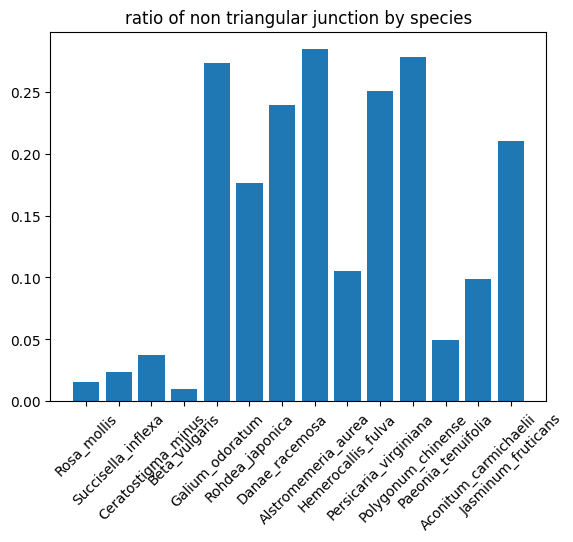

In [61]:
#Creation of the bar plot
plt.pyplot.bar(x,height)
plt.pyplot.title("ratio of non triangular junction by species")
plt.pyplot.xticks(rotation = 45)